In [1]:
import numpy as np
from cmocean import cm
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater

# Data clean, save as new .csv file to mai_workspace

In [ ]:
# runhorse = True
# if runhorse:

#     tdir = '/gpfs/home/mep22dku/scratch/DATA/'
#     glodap = pd.read_csv(f'{tdir}GLODAPv2.2021_Merged_Master_File.csv')
#     pd.set_option('display.max_columns', None)
#     pd.set_option('display.max_rows', None)
#     #print(glodap.head())

#     tDIC = np.array(glodap['G2tco2'][:])
#     tco2f = np.array(glodap['G2tco2f'][:])
#     tco2qc = np.array(glodap['G2tco2qc'][:])

#     tALK = np.array(glodap['G2talk'][:])
#     talkf = np.array(glodap['G2talkf'][:])
#     tco2f = np.array(glodap['G2tco2f'][:])

#     tSAL = np.array(glodap['G2salinity'][:])
#     tTEMP = np.array(glodap['G2temperature'][:])
#     tPRES = np.array(glodap['G2pressure'][:])
#     tLAT = np.array(glodap['G2latitude'][:])
#     tLON = np.array(glodap['G2longitude'][:])
#     tYEAR = np.array(glodap['G2year'])
#     tMONTH = np.array(glodap['G2month'])
#     #tAOU = np.array(glodap['aou'][:])

#     dens = seawater.dens(tSAL,tTEMP,tPRES)
#     tDIC=tDIC*dens/1000
#     tALK=tALK*dens/1000

#     tALK_DIC = tALK-tDIC
#     tALK_DIC2 = tALK-(tDIC+50)

#     # tfilt = (tLAT <= -50) & (tco2f < 9) & (talkf <9) & ~np.isnan(tDIC) & ~np.isnan(tALK) 
#     tfilt = (tco2f < 9) & (talkf <9) & ~np.isnan(tDIC) & ~np.isnan(tALK) 
#     tALK_SO = tDIC[tfilt]
#     print(np.nanmin(tALK_SO))
#     tco2f_SO =  tco2f[tfilt]
#     tco2qc_SO = tco2qc[tfilt]
#     tALK_SO = tALK[tfilt]
#     talkf_SO = talkf[tfilt]
#     tco2f_SO = tco2f[tfilt]

#     tSAL_SO = tSAL[tfilt]
#     tTEMP_SO = tTEMP[tfilt]
#     tPRES_SO = tPRES[tfilt]
#     tLAT_SO = tLAT[tfilt]
#     tLON_SO = tLON[tfilt]
#     tYEAR_SO = tYEAR[tfilt]
#     tMONTH_SO = tMONTH[tfilt]
#     tSECT_SO = np.zeros_like(tLON_SO)
#     tSECT_SO[(tLON_SO <= -67) | (tLON_SO > 150)] = 4 #pacific
#     tSECT_SO[(tLON_SO <= 20) &(tLON_SO > -67)] = 2 #atl
#     tSECT_SO[(tLON_SO > 20) &(tLON_SO <= 150)] = 3 #indian

#     print(np.shape(tYEAR_SO))
#     df = pd.DataFrame([tYEAR_SO,tMONTH_SO,tDIC_SO,tALK_SO,tSAL_SO,tTEMP_SO,tPRES_SO,tLAT_SO,tLON_SO,tSECT_SO]).T
#     # df = df.sort_values(by = tYEAR_SO)
#     df.columns = ['YR', 'MONTH', 'DIC', 'ALK', 'SAL', 'TEMP', 'PRES', 'LAT', 'LON', 'SECT']
#     # df.to_csv('/gpfs/home/gdg21vsa/mai_workspace/GLODAPv2.2021_GLOBE_valid_DICTA_umolL.csv')

In [ ]:
# df.to_csv('/gpfs/home/gdg21vsa/mai_workspace/GLODAPv2.2021_GLOBE_valid_DICTA_umolL.csv')

# Read new .csv file; Valid DIC and TA measurements in Global Ocean \n GLODAPv2.2021

In [2]:
df = pd.read_csv('/gpfs/home/gdg21vsa/mai_workspace/GLODAPv2.2021_GLOBE_valid_DICTA_umolL.csv')
df = df.sort_values(by = 'YR')

tDIC_SO = np.array(df['DIC'][:])
tALK_SO = np.array(df['ALK'][:])


tSAL_SO = np.array(df['SAL'][:])
tTEMP_SO = np.array(df['TEMP'][:])
tPRES_SO = np.array(df['PRES'][:])
tLAT_SO = np.array(df['LAT'][:])
tLON_SO = np.array(df['LON'][:])
tYEAR_SO = np.array(df['YR'])
tMONTH_SO = np.array(df['MONTH'])
tSECT_SO = np.array(df['SECT'])

In [3]:
print(df.head(5).describe())

         Unnamed: 0      YR  MONTH          DIC          ALK       SAL  \
count      5.000000     5.0    5.0     5.000000     5.000000   5.00000   
mean   56786.000000  1972.0   10.0  2275.754123  2439.920374  34.89580   
std        1.581139     0.0    0.0     6.345931     4.080784   0.00687   
min    56784.000000  1972.0   10.0  2269.089052  2435.321484  34.88600   
25%    56785.000000  1972.0   10.0  2269.276837  2436.395157  34.89400   
50%    56786.000000  1972.0   10.0  2277.843262  2440.058652  34.89600   
75%    56787.000000  1972.0   10.0  2279.129730  2443.162157  34.89800   
max    56788.000000  1972.0   10.0  2283.431736  2444.664421  34.90500   

           TEMP         PRES    LAT     LON  SECT  
count  5.000000     5.000000  5.000   5.000   5.0  
mean   2.315800  3947.200000  7.958 -43.853   2.0  
std    0.081687   241.132121  0.000   0.000   0.0  
min    2.223000  3640.000000  7.958 -43.853   2.0  
25%    2.270000  3796.000000  7.958 -43.853   2.0  
50%    2.305000  3949

In [38]:
yrs = np.arange(1972,2021,1)
OBS_depths = np.zeros([5,len(yrs)])
OBS_seas = np.zeros([4,len(yrs)])
OBS_lats = np.zeros([6,len(yrs)])
OBS_sects = np.zeros([3,len(yrs)])

for i in range(0,len(yrs)):
    tyr = yrs[i]

    OBS_depths[0,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tPRES_SO<=200)])
    OBS_depths[1,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tPRES_SO>200) & (tPRES_SO<=500)]) 
    OBS_depths[2,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tPRES_SO>500) & (tPRES_SO<=1000)]) 
    OBS_depths[3,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tPRES_SO>1000) & (tPRES_SO<=3000)]) 
    OBS_depths[4,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tPRES_SO>3000)]) 
    
    #season
    OBS_seas[0,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tMONTH_SO<=11) & (tMONTH_SO>8)]) #spring
    OBS_seas[1,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & ((tMONTH_SO==12) | (tMONTH_SO<=2))])  #sumer
    OBS_seas[2,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tMONTH_SO>2) & (tMONTH_SO<=5)]) #autum
    OBS_seas[3,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tMONTH_SO>5) & (tMONTH_SO<=8)]) #winter
    
    #sectors
#spring
    OBS_sects[0,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tSECT_SO == 2)]) #atl
    OBS_sects[1,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & (tSECT_SO == 3)])  #ind
    OBS_sects[2,i] = np.size(tDIC_SO[(tYEAR_SO == tyr) & ((tSECT_SO == 4))]) #pac

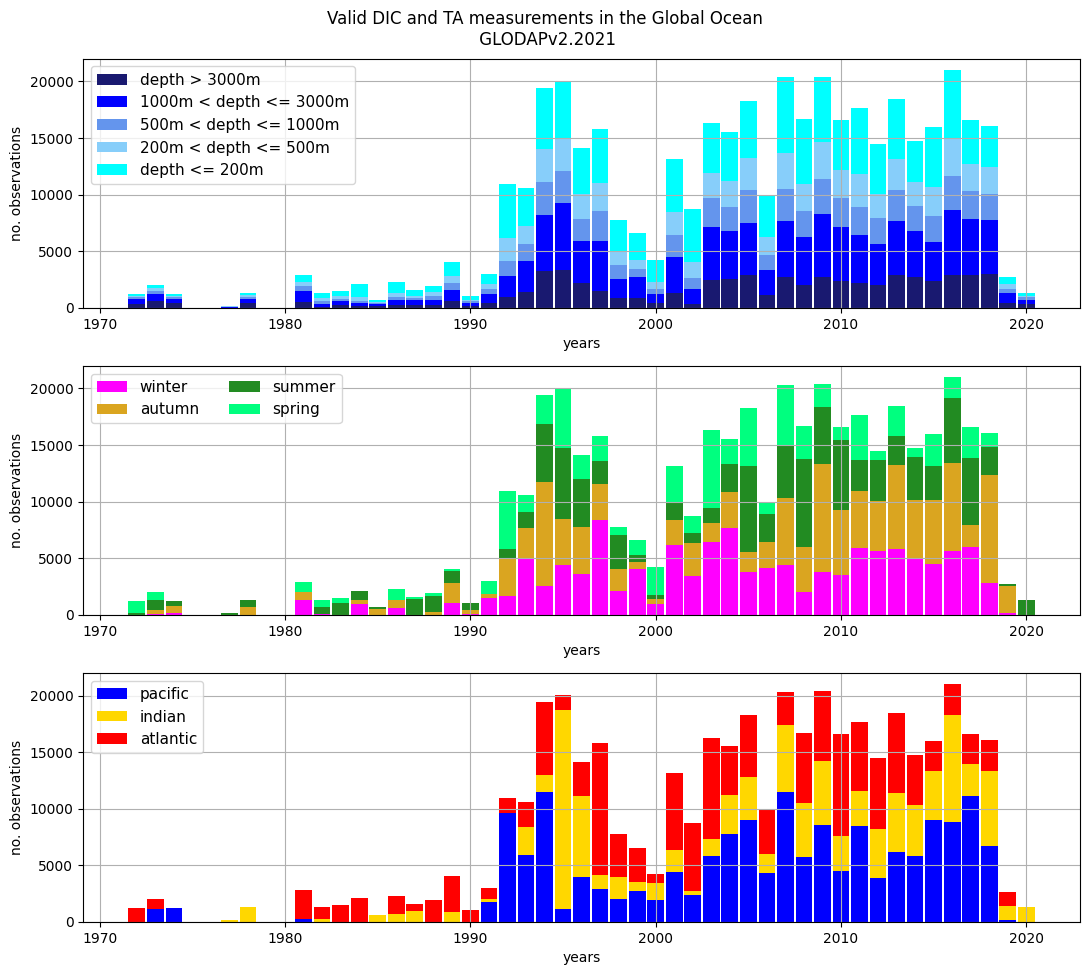

In [39]:
fact = 0.55
fig, axs = plt.subplots(3,1, figsize=(20*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
fs = 11
width = 0.9
axs[0].bar(yrs,OBS_depths[4,:],width, color = 'midnightblue', label = 'depth > 3000m')
axs[0].bar(yrs,OBS_depths[3,:],width, bottom = OBS_depths[4,:], color = 'b', label = '1000m < depth <= 3000m')
axs[0].bar(yrs,OBS_depths[2,:],width, bottom = OBS_depths[4,:]+ OBS_depths[3,:], color = 'cornflowerblue', label = '500m < depth <= 1000m')
axs[0].bar(yrs,OBS_depths[1,:],width, bottom = OBS_depths[4,:]+ OBS_depths[3,:]+OBS_depths[2,:], color = 'lightskyblue', label = '200m < depth <= 500m')
axs[0].bar(yrs,OBS_depths[0,:],width, bottom = OBS_depths[4,:]+ OBS_depths[3,:]+OBS_depths[2,:]+OBS_depths[1,:], color = 'cyan', label = 'depth <= 200m')
axs[0].legend(ncol = 1, loc = 'best', fontsize = fs)

axs[1].bar(yrs,OBS_seas[3,:],width,  color = 'magenta', label = 'winter')
axs[1].bar(yrs,OBS_seas[2,:],width, bottom = OBS_seas[3,:], color = 'goldenrod', label = 'autumn')
axs[1].bar(yrs,OBS_seas[1,:],width, bottom = OBS_seas[3,:]+OBS_seas[2,:], color = 'forestgreen', label = 'summer')
axs[1].bar(yrs,OBS_seas[0,:],width, bottom = OBS_seas[3,:]+OBS_seas[2,:]+OBS_seas[1,:], color = 'springgreen', label = 'spring')
axs[1].legend(ncol = 2, loc = 'best', fontsize = fs)

axs[2].bar(yrs,OBS_sects[2,:],width,  color = 'b', label = 'pacific')
axs[2].bar(yrs,OBS_sects[1,:],width, bottom = OBS_sects[2,:], color = 'gold', label = 'indian')
axs[2].bar(yrs,OBS_sects[0,:],width, bottom = OBS_sects[2,:]+OBS_sects[1,:], color = 'r', label = 'atlantic')
axs[2].legend(ncol = 1, loc = 'best', fontsize = fs)
# ax.bar(x, diat_means, width, yerr=men_std, label='diat',color = 'r', alpha = 0.8)
# ax.bar(x, flag_means, width, yerr=women_std, bottom=diat_means,
#        label='flag', color = 'r', hatch='.', alpha = 0.6)

for i in range(0,3):
    axs[i].set_ylim([0,22000])
    axs[i].grid()
    axs[i].set_xlabel('years'); axs[i].set_ylabel('no. observations')

plt.suptitle('Valid DIC and TA measurements in the Global Ocean\n GLODAPv2.2021')
plt.tight_layout()

# Regional trends

In [42]:
print(df.head(5))

       Unnamed: 0      YR  MONTH          DIC          ALK     SAL   TEMP  \
56784       56784  1972.0   10.0  2269.276837  2435.321484  34.905  2.439   
56785       56785  1972.0   10.0  2279.129730  2440.058652  34.896  2.342   
56786       56786  1972.0   10.0  2269.089052  2436.395157  34.898  2.305   
56787       56787  1972.0   10.0  2277.843262  2443.162157  34.894  2.270   
56788       56788  1972.0   10.0  2283.431736  2444.664421  34.886  2.223   

         PRES    LAT     LON  SECT  
56784  3640.0  7.958 -43.853   2.0  
56785  3796.0  7.958 -43.853   2.0  
56786  3949.0  7.958 -43.853   2.0  
56787  4101.0  7.958 -43.853   2.0  
56788  4250.0  7.958 -43.853   2.0  


#Data filtering, 1990 - 2021, different SECT

In [75]:
# 1990 - 2021, different SECT
df_atl = df[(df.YR > 1989) & (df.SECT == 2) ]
df_ind = df[(df.YR > 1989) & (df.SECT == 3)]
df_pac = df[(df.YR > 1989) & (df.SECT == 4)]

In [116]:
# DIC
dfDIC_atl = df_atl.groupby(['YR']).agg({'DIC':[np.median,np.mean,np.std]})
dfDIC_ind = df_ind.groupby(['YR']).agg({'DIC':[np.median,np.mean,np.std]})
dfDIC_pac = df_pac.groupby(['YR']).agg({'DIC':[np.median,np.mean,np.std]})

#EDIT: Renaming columns
dfDIC_atl.columns = ['median','mean','STD']
dfDIC_atl.reset_index(inplace=True)

dfDIC_ind.columns = ['median','mean','STD']
dfDIC_ind.reset_index(inplace=True)

dfDIC_pac.columns = ['median','mean','STD']
dfDIC_pac.reset_index(inplace=True)


In [ ]:
# ALK
dfALK_atl = df_atl.groupby(['YR']).agg({'ALK':[np.median,np.mean,np.std]})
dfALK_ind = df_ind.groupby(['YR']).agg({'ALK':[np.median,np.mean,np.std]})
dfALK_pac = df_pac.groupby(['YR']).agg({'ALK':[np.median,np.mean,np.std]})

#EDIT: Renaming columns
dfALK_atl.columns = ['median','mean','STD']
dfALK_atl.reset_index(inplace=True)

dfALK_ind.columns = ['median','mean','STD']
dfALK_ind.reset_index(inplace=True)

dfALK_pac.columns = ['median','mean','STD']
dfALK_pac.reset_index(inplace=True)

    # PLOTS, DIC

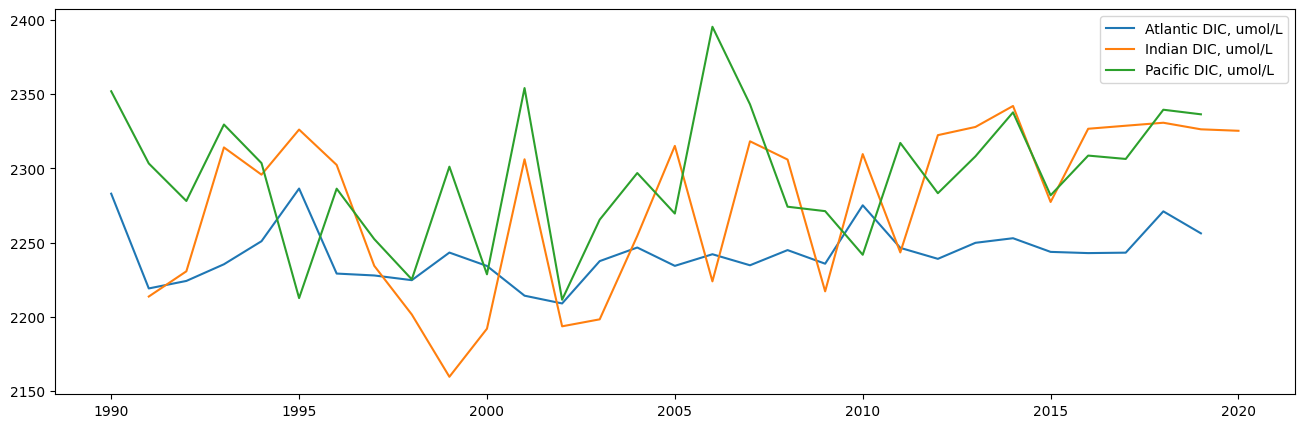

In [144]:
plt.figure(figsize=(16, 5))
plt.plot(dfDIC_atl['YR'], dfDIC_atl['median'], label = 'Atlantic DIC, umol/L')
plt.plot(dfDIC_ind['YR'], dfDIC_ind['median'], label = 'Indian DIC, umol/L')
plt.plot(dfDIC_pac['YR'], dfDIC_pac['median'], label = 'Pacific DIC, umol/L')
plt.legend()

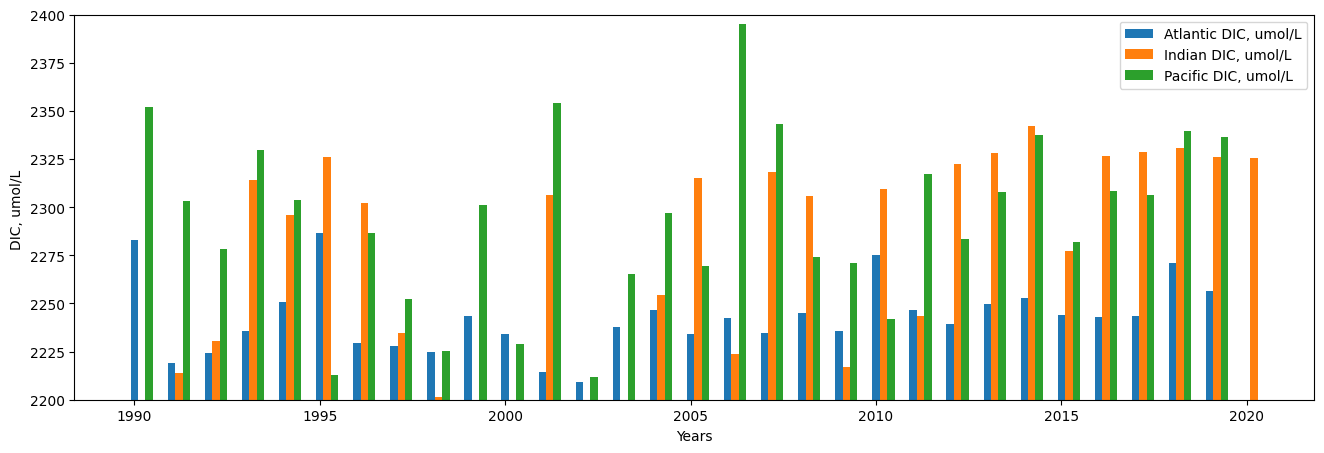

In [140]:
plt.figure(figsize=(16, 5))
plt.bar(dfDIC_atl['YR'], dfDIC_atl['median'], 0.2, label = 'Atlantic DIC, umol/L')
plt.bar(dfDIC_ind['YR'] + 0.2, dfDIC_ind['median'], 0.2, label = 'Indian DIC, umol/L')
plt.bar(dfDIC_pac['YR'] + 0.4, dfDIC_pac['median'], 0.2, label = 'Pacific DIC, umol/L')

plt.ylim(2200, 2400)

plt.xlabel("Years")
plt.ylabel("DIC, umol/L ")
#plt.title("xxx")
plt.legend()
plt.show()

Text(0.5, 1.0, 'pac')

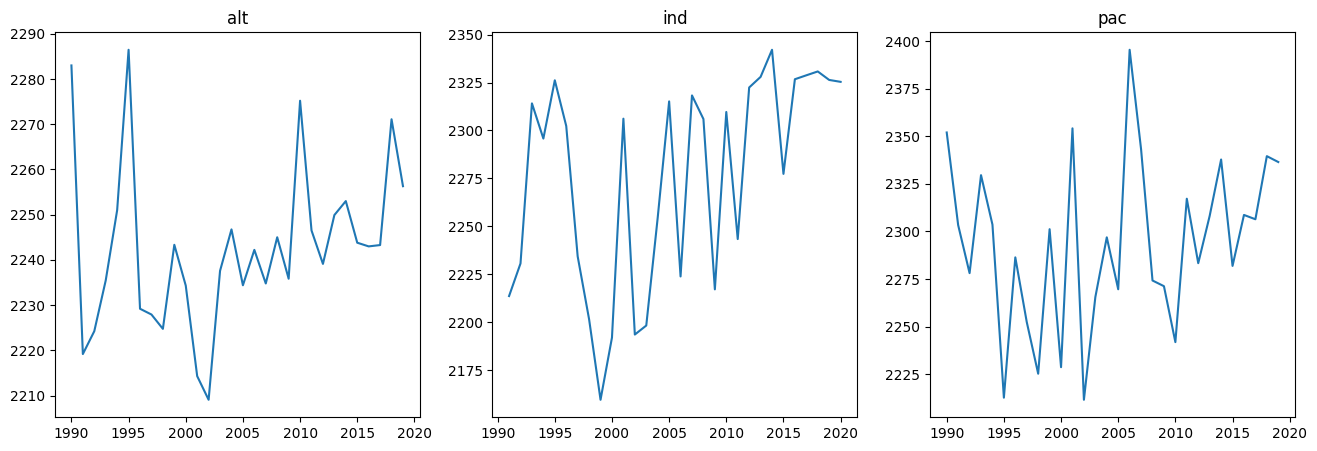

In [146]:
fig, axs = plt.subplots(1,3, figsize=(16, 5), facecolor='w', edgecolor='k')

w = axs[0].plot(dfDIC_atl['YR'], dfDIC_atl['median'], label = 'DIC, umol/L')
axs[0].set_title('alt')

w = axs[1].plot(dfDIC_ind['YR'], dfDIC_ind['median'], label = 'DIC, umol/L')
axs[1].set_title('ind')

w = axs[2].plot(dfDIC_pac['YR'], dfDIC_pac['median'], label = 'DIC, umol/L')
axs[2].set_title('pac')


    # PLOTS, ALK

    # PLOTS, (ALK - DIC)